In [6]:
import os.path as op
import warnings

import numpy as np
import pandas as pd

from utilities import reduce_df_mem_usage, plot_meter, denoise

from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
%matplotlib inline

rand_seed = 1234
rand_state = np.random.RandomState(rand_seed)

warnings.simplefilter(action='ignore', category=FutureWarning)

PATH = '/home/dhren/Documents/000_flatiron/002_projects/006_1028_kaggle_ASHRAE/data'

FIGSIZE = (22, 20)

In [8]:
%%time

df_train = reduce_df_mem_usage(pd.read_csv(op.join(PATH, 'train.csv')))
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])
display(df_train.head())

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


CPU times: user 7.96 s, sys: 532 ms, total: 8.49 s
Wall time: 6.26 s


In [9]:
%%time

group = ['building_id', 'meter']
target = 'meter_reading'

grp = df_train.groupby(group, sort = False)[[target]]
df_train[target + "_denoise"] = grp.transform(denoise)

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/pandas/core/groupby/generic.py:627: RuntimeWarning: invalid value encountered in less
  lambda x: func(x, *args, **kwargs), axis=self.axis
/opt/miniconda3/envs/ml/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/miniconda3/envs/ml/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/miniconda3/envs/ml/lib/python3.7/site-packages/pandas/core/groupby/generic.py:627: RuntimeWarning: invalid value encountered in less_equal
  lambda x: func(x, *args, **kwargs), axis=self.axis


CPU times: user 1min 31s, sys: 1.02 s, total: 1min 32s
Wall time: 27.1 s


/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


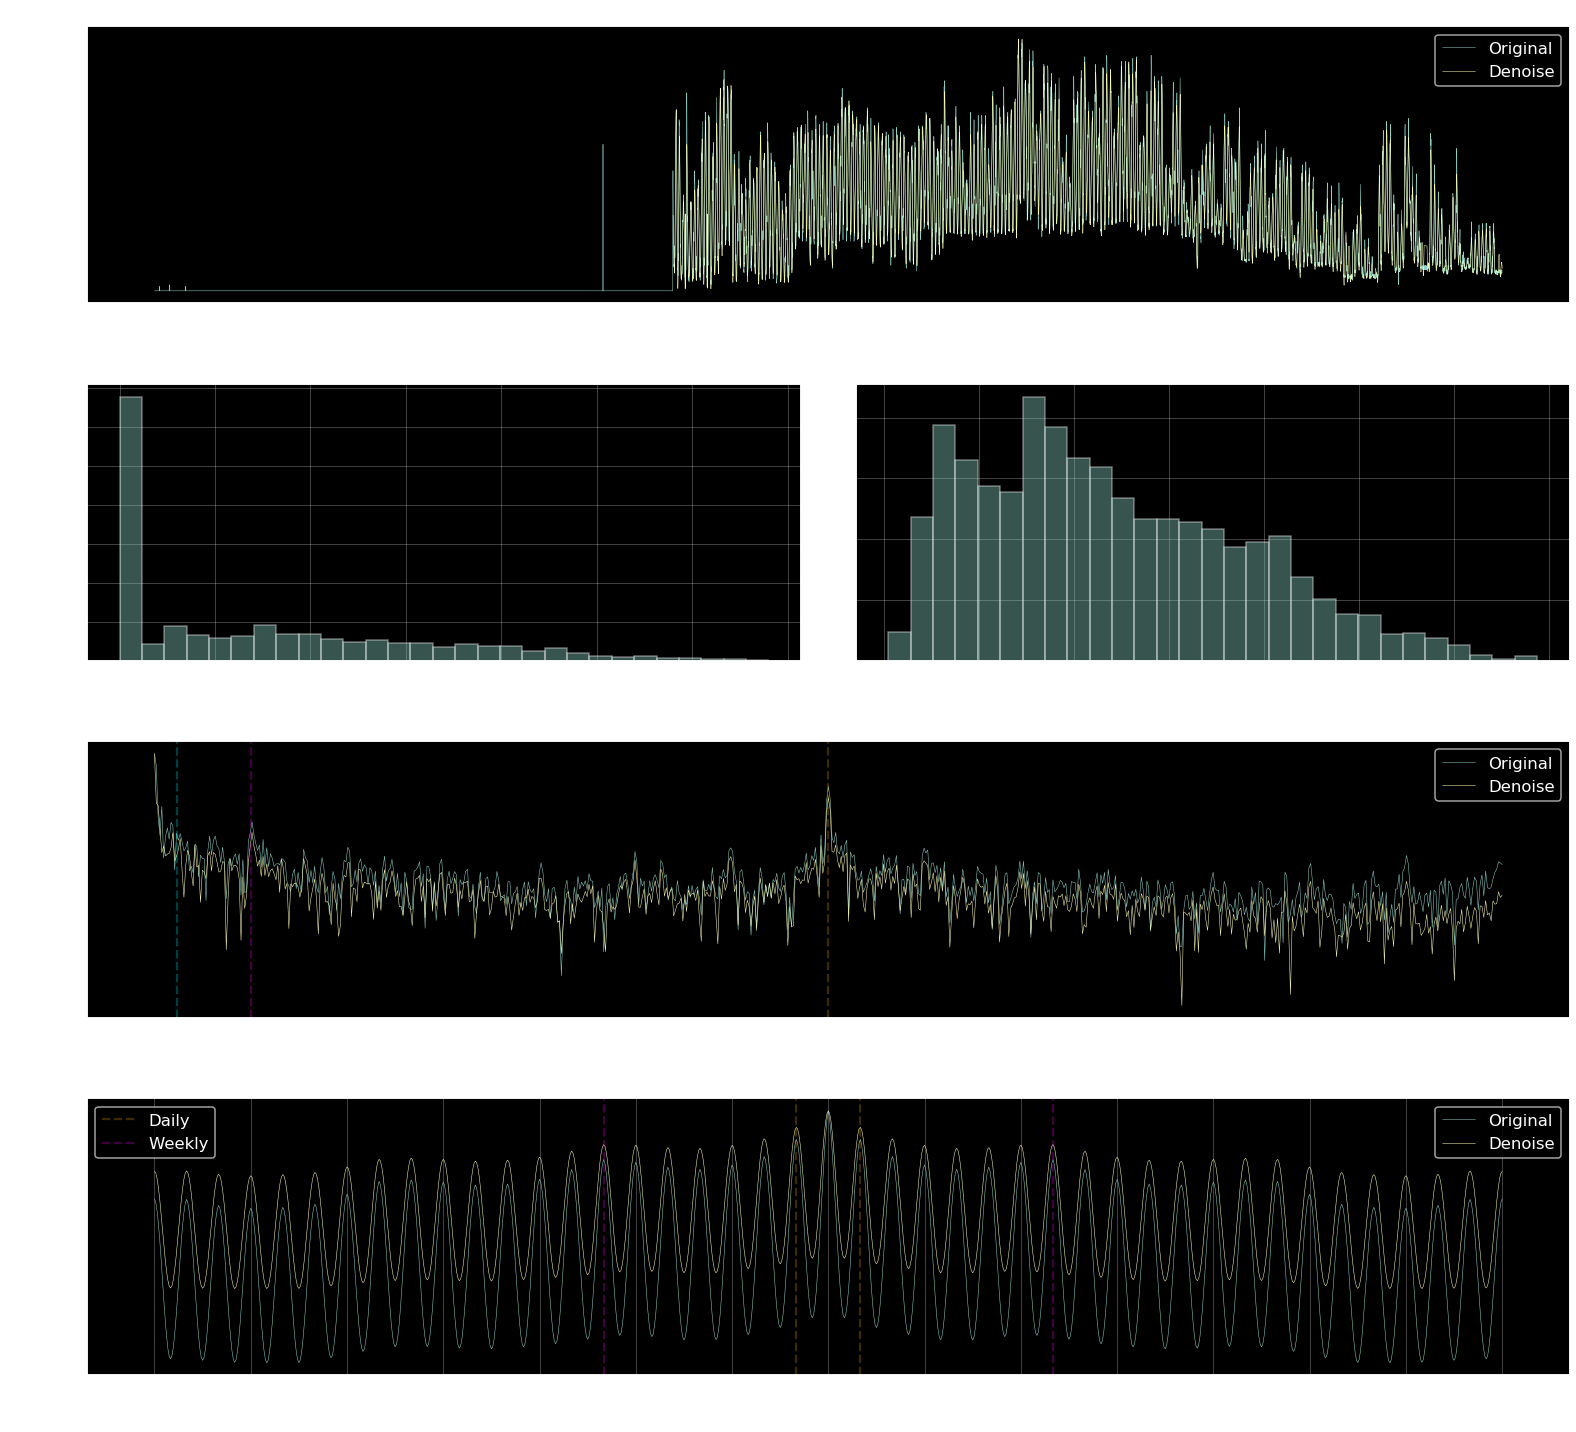

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


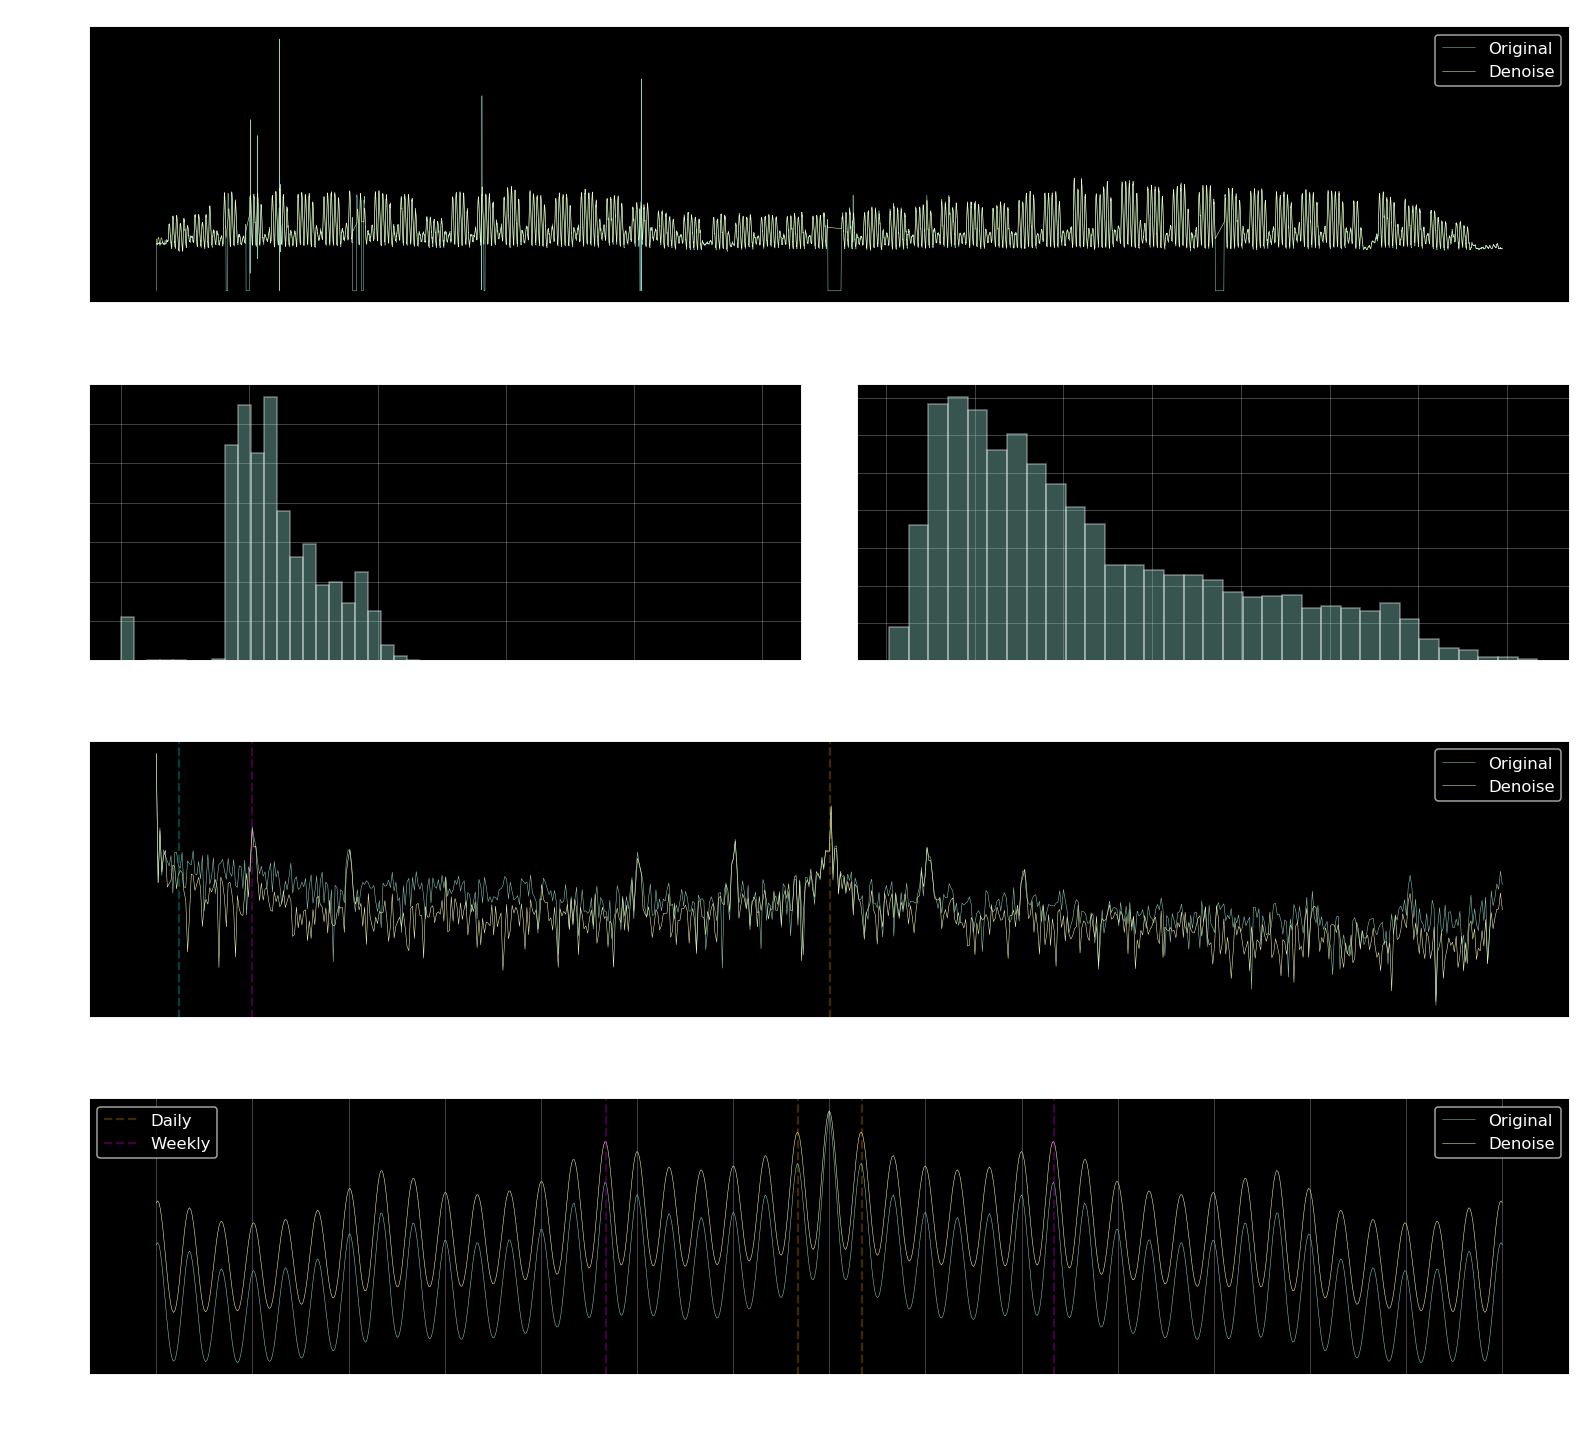

In [10]:
plot_meter(df_train, 2, 0, FIGSIZE)
plot_meter(df_train, 922, 0, FIGSIZE)